### <center> Importing essential libraries </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <center>Loading dataset from csv file as a dataframe and inspection top 5 records </center>

In [2]:
original_df = pd.read_csv('data.csv')
original_df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


### <center>Inspection shape(rows x cols) of dataframe</center>

In [3]:
original_df.shape

(251079, 15)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

### Our target variable(price) is in string format so converting it into float

In [5]:
original_df['price_in_euro'] = pd.to_numeric(original_df['price_in_euro'], errors='coerce')

In [6]:
original_df.describe()

,Unnamed: 0,price_in_euro,mileage_in_km
count,251079.000000,2.508800e+05,2.509270e+05
mean,125539.000000,2.613753e+04,8.534002e+04
std,72480.408456,3.698795e+04,7.871706e+04
min,0.000000,1.200000e+02,0.000000e+00
25%,62769.500000,1.199000e+04,2.490400e+04
50%,125539.000000,1.989000e+04,6.750000e+04
75%,188308.500000,2.995000e+04,1.265000e+05
max,251078.000000,5.890500e+06,3.800000e+06


### drop those record/rows with null values in price column

In [7]:
original_df.dropna(subset=['price_in_euro'], inplace=True)

In [8]:
original_df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


### Dropping unnnecessary columns

In [9]:
df = original_df.drop(columns=['Unnamed: 0', 'registration_date', 'fuel_consumption_g_km'])

In [10]:
df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,1995,24900.0,191,260,Manual,Petrol,NaN,190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,1995,5900.0,110,150,Unknown,Petrol,NaN,129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",96127.0,"3.0i Super V6, absoluter Topzustand !"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250880 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     250880 non-null  object 
 1   model                     250880 non-null  object 
 2   color                     250714 non-null  object 
 3   year                      250880 non-null  object 
 4   price_in_euro             250880 non-null  float64
 5   power_kw                  250752 non-null  object 
 6   power_ps                  250752 non-null  object 
 7   transmission_type         250880 non-null  object 
 8   fuel_type                 250880 non-null  object 
 9   fuel_consumption_l_100km  224007 non-null  object 
 10  mileage_in_km             250818 non-null  float64
 11  offer_description         250880 non-null  object 
dtypes: float64(2), object(10)
memory usage: 24.9+ MB


### Converting features into neumeric. (values are represented as str eventhough they are neumeric)

In [12]:
cols =  ['year','power_kw', 'power_ps']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [13]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.').str.extract(r'(\d+\.\d+)').astype(float)

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200404 entries, 0 to 251076
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     200404 non-null  object 
 1   model                     200404 non-null  object 
 2   color                     200404 non-null  object 
 3   year                      200404 non-null  float64
 4   price_in_euro             200404 non-null  float64
 5   power_kw                  200404 non-null  float64
 6   power_ps                  200404 non-null  float64
 7   transmission_type         200404 non-null  object 
 8   fuel_type                 200404 non-null  object 
 9   fuel_consumption_l_100km  200404 non-null  float64
 10  mileage_in_km             200404 non-null  float64
 11  offer_description         200404 non-null  object 
dtypes: float64(6), object(6)
memory usage: 19.9+ MB


## <center>Exploratory Data Analysis (EDA)</center>

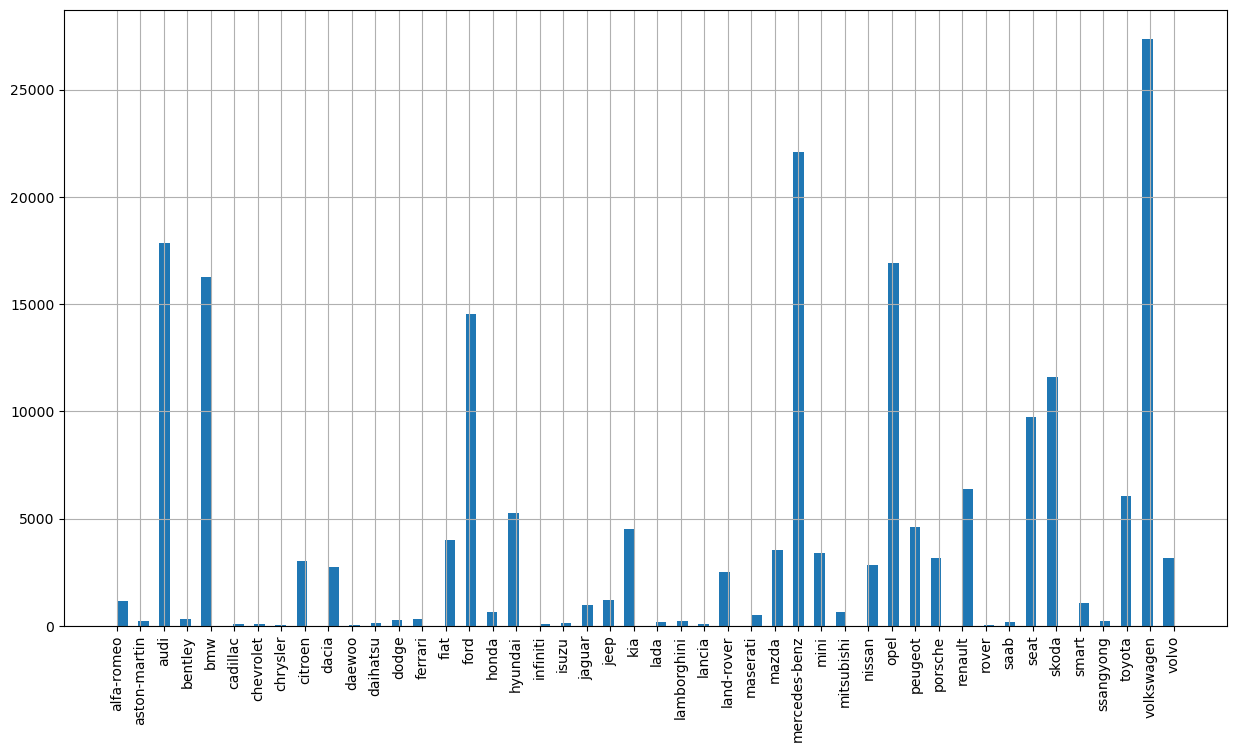

In [16]:
df['brand'].hist(bins=100,figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

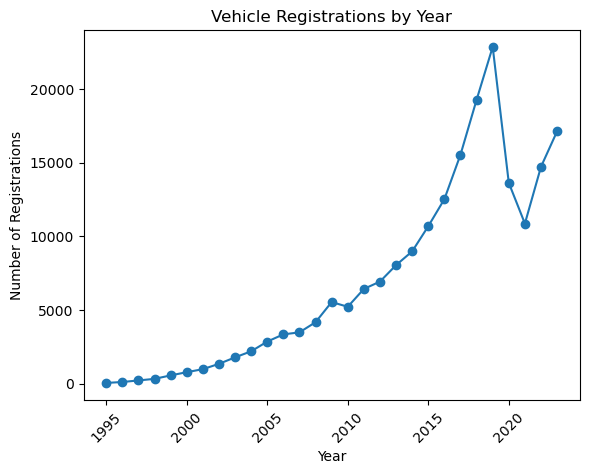

In [17]:
registrations_by_year = df['year'].value_counts().sort_index()
plt.plot(registrations_by_year.index, registrations_by_year.values, marker='o')
plt.title('Vehicle Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

In [18]:
bar_plt_col = df['color'].value_counts()
labels = list(bar_plt_col.index)
counts = list(bar_plt_col.values)

([<matplotlib.patches.Wedge at 0x170f5fc61d0>,
 [Text(0.808514577288458, 0.7458580148473744, 'black'),
  Text(-0.5347482799932217, 0.961272217971731, 'grey'),
  Text(-1.0997111121931897, -0.025208524725136513, 'white'),
  Text(-0.6316620289931282, -0.9005570948742143, 'silver'),
  Text(0.24684767058889315, -1.0719450674007682, 'blue'),
  Text(0.8544357678194107, -0.6927766730129228, 'red'),
  Text(1.0291557405846516, -0.3883792754790827, 'brown'),
  Text(1.0624082587105141, -0.2851117181451746, 'orange'),
  Text(1.0821795835326729, -0.19719875502916076, 'green'),
  Text(1.0933213226572687, -0.12103092754730385, 'beige'),
  Text(1.098063209994573, -0.06524712144159574, 'yellow'),
  Text(1.0994701614833517, -0.03413742825364733, 'bronze'),
  Text(1.099840890671861, -0.0187086933303092, 'gold'),
  Text(1.099985636051575, -0.005621430441853201, 'violet')])

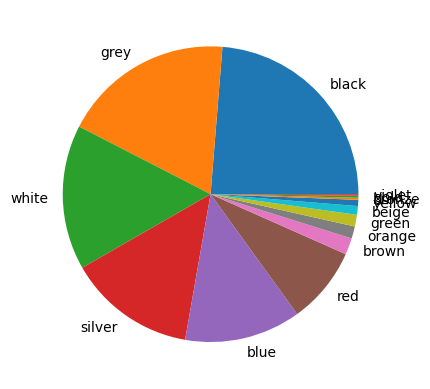

In [19]:
# fig, ax = plt.subplots()
plt.pie(counts, labels=labels)